In [24]:
import pandas as pd
import numpy as np

from datetime import datetime

In [25]:
%matplotlib inline

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

In [27]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

# EXPLORATIVE DATA ANALYSIS

Focus is often a virtual representation of the data

In [28]:
df_plot = pd.read_csv('../data/processed/COVID_small_flat_table.csv', sep=';')
df_plot.sort_values('date', ascending=False).head()

,date,US,Germany,India
883,2022-06-23,86757621,27681775,43362294
882,2022-06-22,86636306,27573585,43344958
881,2022-06-21,86452232,27454225,43331645
880,2022-06-20,86297081,27334993,43319396
879,2022-06-19,86246101,27211896,43309473


## MATPLOTLIB EXAMPLE

<Figure size 1152x648 with 0 Axes>

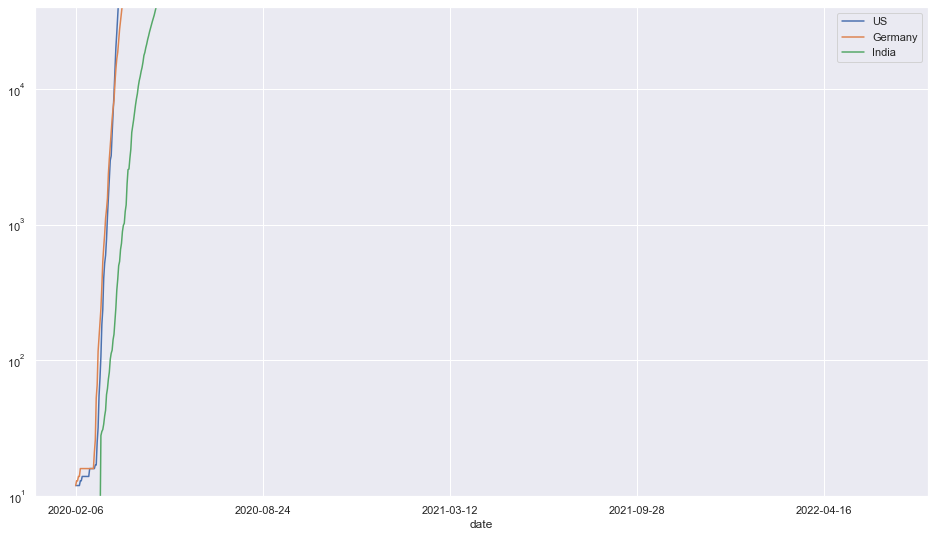

In [29]:
plt.figure();
ax = df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 40000)
ax.set_yscale('log')

In [30]:
import plotly.graph_objects as go

import plotly
plotly.__version__

'5.6.0'

In [31]:
country_list = ['US',
                 'Germany',
                  'India',
            
               ]

In [32]:
fig = go.Figure()
##defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date, 
                                y=df_plot[each],
                                mode = 'markers + lines',
                                 opacity = 0.9,
                                    line_width = 2,
                                        marker_size = 4,
                                            name = each) )
    

In [33]:
##defines the overall layout properties
fig.update_layout(width = 1024, height = 900, xaxis_title = "Time",
                   yaxis_title = "Confirmed infected people (source johns hopkins csse, log-s)")
fig.update_yaxes(type = "log", range = [1.1, 5.5])


fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='chrome')
fig.show()

In [34]:
import dash
dash.__version__
from dash import html
from dash import dcc
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Korea, South', 'value': 'Korea, South'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

/tmp/ipykernel_5869/1534069058.py:5: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/tmp/ipykernel_5869/1534069058.py:6: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [35]:
pwd

'/home/balaji/dsProject/notebooks'

In [36]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }